In [1]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [3]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile

In [4]:
survey  = 'gama'
version = 'GAMA4'
dryrun  = False

In [5]:
fpath     = findfile(ftype='zmax', dryrun=dryrun, version=version, survey=survey)
gama_zmax = Table.read(fpath)
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,JK,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,bytes4,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
560367,588848899375825135,180.12588394,-0.5937657,18.599897,0.17151,4,G12_Y1_ES2_327,6,21.23269,19.610481,18.504696,17.916262,17.505035,0.17151,582.1441797346662,38.825152798751276,G12,0,0,-496.88993234358065,-1.0917132746844402,-5.14954985191297,496.8761600457173,-3.0820340973700975,-5.647761503914847,1.1057854,18.599897,JK4,0.9103154854055789,0,6,-0.011769795165824992,0.18370008930164283,0.21510508328074512,0.561864707052836,0.759025746100956,0.8,-0.1663647,-0.137208,-20.273995797786338,-20.303152497562987,-20.440360497388465,38.873893182429896,39.04025788203202,38.903049882206545,-0.05934207400341749,0.06806101789584604,0.15738280435878363,0.3332363076095093,-20.216273518864377,1.2001019,0.2731009090845904,0.0,-6.5998974,0.009545109567896675,0.0,8479932.540936407
208588,587725074987876392,129.58898455,0.18220989,18.842192,0.07959,4,G09_Y1_AS2_288,6,21.44489,19.758184,18.888025,18.5268,18.288902,0.07959,253.66656373300447,37.02131612910743,G9,0,0,-149.73717907766925,181.07202516629394,0.7472277105197227,148.21162709629013,-182.3233794501662,0.5986188714962972,0.87015915,18.842192,JK0,0.9165047440303024,0,6,-0.12961584976982438,-0.17596144463020486,0.09714668086165656,0.20445364610042605,0.7628521839311524,0.8,-0.077202305,-0.063672,-18.19906880860438,-18.212599115122458,-18.276271113802096,37.04126050477137,37.11846280996909,37.05479081128945,-0.12027285099336646,-0.14498077516499486,0.09645202736883465,0.12019451454866842,-18.19837415511156,0.95780754,0.11922916393998877,0.0,-6.8421917,0.0036657441154110066,0.0,778209.9659177916
63220,587722982829130118,215.01355265,-0.36740351,17.46823,0.12615,5,342314280604952576,6,19.526714,18.069859,17.392889,17.03065,16.77651,0.12615,415.48585538081625,38.09278121719966,G15,0,0,-302.16463914316876,-211.68449208440353,-2.365798161588926,303.9295332821462,209.13894264601316,-2.6705441953138664,0.6769695,17.46823,JK6,0.6346517966475159,0,4,-0.08343476813905235,-0.04111703658832605,0.13549260756372664,0.23577537188441683,0.576686763877552,2.12,-0.122365505,-0.26743796,-20.637679026436892,-20.49260656626233,-20.760044530940142,38.105908320260134,38.228273824763384,37.960835860085574,-0.08519897280008143,-0.045025038372019696,0.13152590556211968,0.22015025134164357,-20.633712324435287,2.33177,0.3733515511433368,0.0,-5.4682293,0.010454277565743452,0.0,20254169.363646314
560751,588848899376480390,181.51136885,-0.61197239,17.807583,0.18032,4,G12_Y1_FS1_316,6,20.757238,18.82045,17.697247,17.266537,16.934586,0.18032,615.5098200833555,38.94617493112946,G12,0,0,-521.2659121873513,-13.75333135249762,-5.569755741903392,521.3571996662812,9.374387247227162,-6.09251431677462,1.1232033,17.807583,JK4,0.9035532804082462,0,6,-0.0014159741315009355,0.21823402304814354,0.22558165228905114,0.5939398390993841,0.7548450907775577,0.8,-0.1

In [6]:
fpath     = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

WEIGHT_STEPWISE,FIELD,MCOLOR_0P0,IN_D8LUMFN,MALL_0P0,ZSURV,ZMAX,ZMIN,VMAX,VZ
,,mag,,mag,,,,,
float64,bytes3,float64,int64,float64,float32,float64,float64,float64,float64
4.584470153194735,G12,-20.303152497562987,0,-20.273995797786338,0.17151,0.26298999786376953,0.03903000056743622,7594841.612883208,2214006.379379328
1.8026043529105293,G9,-18.212599115122458,0,-18.19906880860438,0.07959,0.11922916393998877,0.03903000056743622,749599.9257597037,208458.9792430824
3.2372516172360464,G15,-20.49260656626233,0,-20.637679026436892,0.12615,0.26298999786376953,0.03903000056743622,7594841.612883208,889245.9030587805
5.257448359247273,G12,-21.219917732443477,0,-21.189263331856395,0.18032,0.26298999786376953,0.03903000056743622,7594841.612883208,2563226.226761019
8.62724787108412,G9,-20.237954121653768,0,-20.516932573740217,0.24259,0.26298999786376953,0.03903000056743622,7594841.612883208,6035210.161194991
5.257448359247273,G15,-20.515837018975343,0,-20.48536621559533,0.17924,0.26298999786376953,0.03903000056743622,7594841.612883208,2518671.0552019044
3.2372516172360464,G12,-18.65454692926764,0,-18.631387827662223,0.13623,0.14324243306541382,0.03903000056743622,1301104.9698871186,1120183.9320889541
8.62724787108412,G15,-20.01920805669913,0,-20.29387399352679,0.23884,0.26298999786376953,0.03903000056743622,7594841.612883208,5772460.895282479


In [7]:
try:
    gama_zmax['ZSURV'] = gama_zmax['ZGAMA']
    gama_vmax['ZSURV'] = gama_vmax['ZGAMA']
except:
    pass

Text(0.5, 0, 'ZMAX')

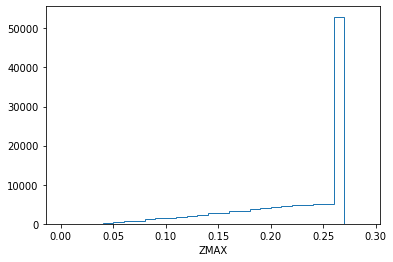

In [8]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [9]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03903   , 0.03981007])

Text(0, 0.5, '$z_{\\rm max}$')

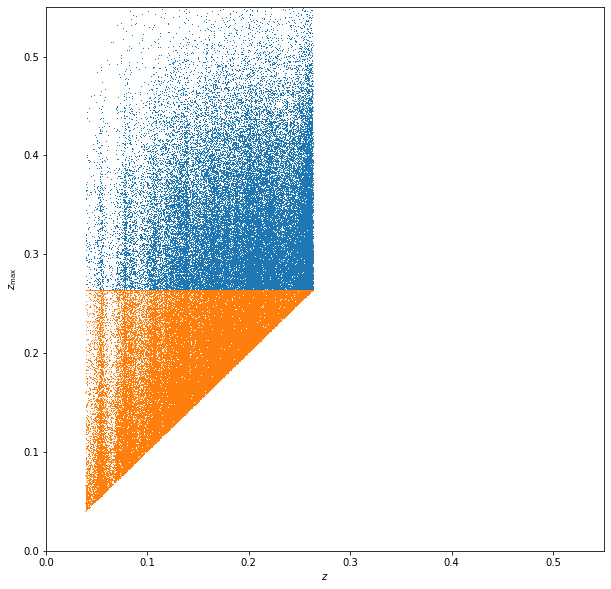

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZSURV'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMAX'], marker=',', lw=0.0)

# ax.axvline(zmin, c='k', lw=0.5) 
# ax.axvline(zmax, c='k', lw=0.5) 
 
# ax.axhline(zmin, c='k', lw=0.5) 
# ax.axhline(zmax, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

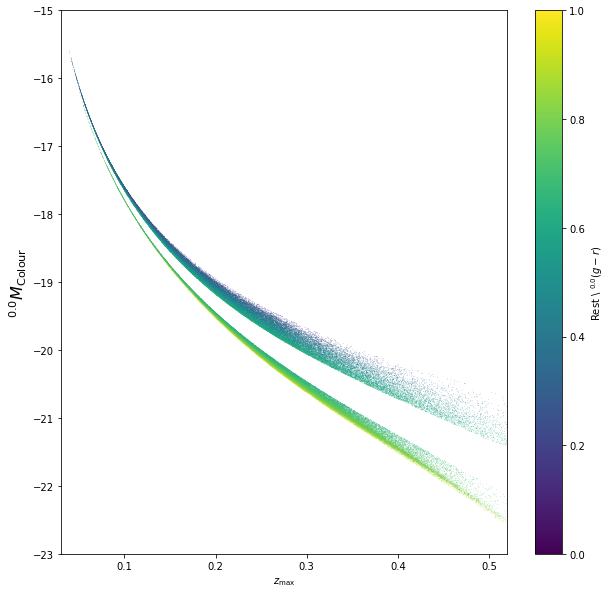

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)

ax.set_xlim(0.03, 0.52)
ax.set_ylim(-23., -15.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

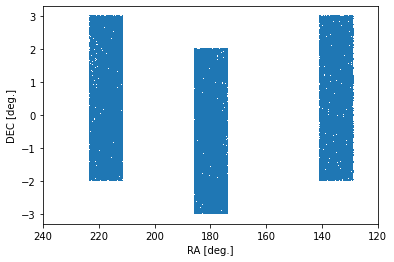

In [12]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [13]:
fpath   = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)
print(fpath)
gama_lf

/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_lumfn.fits


MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
-25.4,0.0,0.0,0.0,0.0,0.0,0.0
-25.200000000000003,0.0,0.0,0.0,0.0,0.0,0.0
-25.0,0.0,0.0,0.0,0.0,0.0,0.0
-24.800000000000004,0.0,0.0,0.0,0.0,0.0,0.0
-24.6,0.0,0.0,0.0,0.0,0.0,0.0
-24.400000000000006,0.0,0.0,0.0,0.0,0.0,0.0
-24.200000000000003,0.0,0.0,0.0,0.0,0.0,0.0
-24.000000000000007,0.0,0.0,0.0,0.0,0.0,0.0
-23.800000000000004,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, '$V/V_{Max}$')

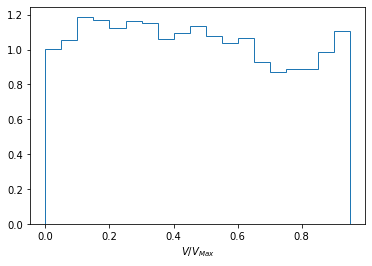

In [17]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

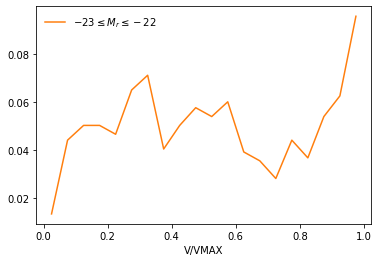

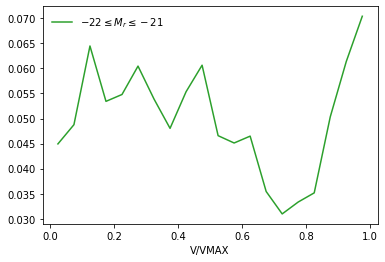

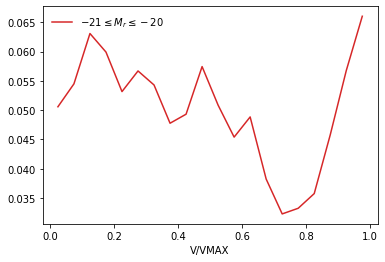

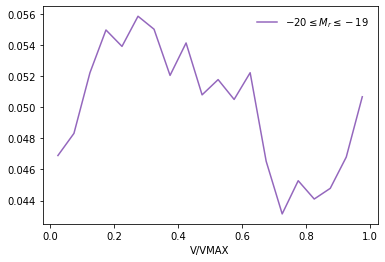

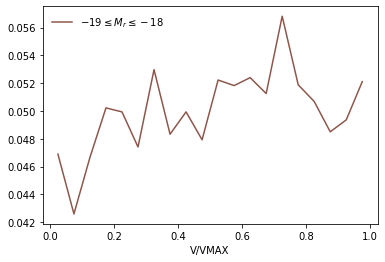

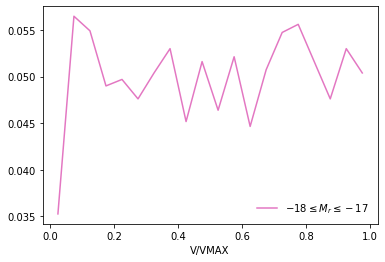

In [18]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [19]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,JK,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,bytes4,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
185322,587725041702469675,179.83440251,-1.64817036,14.160493,0.08135,5,372775163474765824,6,17.064615,15.692654,14.905519,14.343366,14.213043,0.08135,259.6079029836754,37.07158954561004,G12,0,0,-239.97727236461046,0.6935893874232879,-6.905119636685518,239.95593630894075,-2.7092935591663565,-7.1457227418616585,0.7871351,14.160493,JK4,0.8222150124783408,0,5,-0.12544319185352298,-0.160523080125354,0.10303089196510218,0.18560737233721386,0.7045586438344313,0.8,-0.0789095,-0.06508,-22.935218039108076,-22.949047538591184,-23.01412754054145,37.09571093614177,37.17462043757514,37.10954043562488,-0.11872379703855176,-0.14155580081515584,0.09800108132364935,0.12361948889850743,-22.930188228466623,5.6395063,-99.0,2.0,-2.160493,0.03154120966707457,0.0,--
178839,587725041166581794,182.1835035,-2.07231294,14.328211,0.10734,4,G12_Y6_041_249,6,24.575645,17.823496,16.785114,15.850774,18.088587,0.10734,348.95950671254064,37.71387517159247,G12,0,0,-314.6983622428863,-11.998751500068654,-11.395465440223349,314.7764615969768,9.35496746422525,-11.711092038957487,1.0383816,14.328211,JK5,1.0190980480456595,0,6,-0.09298329526027885,-0.07369976676785223,0.14283969236353414,0.32678700770193425,0.8544342611996858,0.8,-0.1041198,-0.085872,-23.424384233236342,-23.442632031321555,-23.528504033267527,37.75259506392482,37.85671486395601,37.770842862010035,-0.09801980357535564,-0.0876437071781144,0.11870507478684547,0.17753158253554888,-23.400249615659654,5.4717884,-99.0,2.0,-2.3282108,0.039334234229219986,0.0,--
125489,587724649258876969,184.17810296,-2.69967347,14.425353,0.25162,4,G12_Y4_203_103,6,15.559951,15.755173,14.309496,28.205227,16.762774,0.25162,896.9591792306916,39.76386339337955,G12,0,0,-713.9407537359408,-52.154217318169536,-33.75421886554996,714.3194415688174,46.155514435440104,-34.47047148430874,1.4456768,14.425353,JK5,0.9922763000644923,0,6,0.11573660675273972,0.5691371102771148,0.34863479662419555,0.9652536473961288,0.829057952816934,0.8,-0.24407141,-0.201296,-25.44307373066556,-25.48584913809907,-25.687145139771815,39.868426780897494,40.11249819000375,39.911202188331,-0.018670125386448577,0.29021962938141105,0.19805475297575253,0.5553949190950743,-25.292493687017117,5.374646,-99.0,2.0,-2.425353,0.09538586652718395,0.0,--
718921,587726031728017438,217.2773885,1.28502947,14.456577,0.08647,3,NED_MRK_1383,4,14.399254,14.418312,14.378856,13.8610735,14.046887,0.08647,276.9712644440074,37.212173568413235,G15,0,0,-202.7981329939006,-154.36433581903054,5.717037181843526,204.09321717251248,152.65545385094066,5.512399344915336,0.039456367,14.456577,JK7,0.05020904994649686,0,1,-0.0982779198530405,-0.10903060230686158,0.06300279945333358,0.018814009181763167,0.08364515776424619,2.12,-0.0838759,-0.1833164,-22.734723164844088,-22.635282672154478,-22.818599066841177,37.1913004658694

In [20]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,JK,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,bytes4,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64


# Done.